### ガボールフィルタの回転

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Gabor
def gabor_filter(K_size=111, sigma=10, gamma=1.2, Lambda=10,  psi=0, angle=0):
    #get half size
    d = K_size//2
    
    # prepare kernel
    gabor = np.zeros((K_size, K_size), dtype=np.float32)
    
    # each value
    for y in range(K_size):
        for x in range(K_size):
            # distance from center
            px = x - d
            py = y - d
            
            # degree -> radian
            theta = angle/180.*np.pi
            
            # get kernel x
            _x = np.cos(theta)*px + np.sin(theta)*py
            # get kernel y
            _y = -np.sin(theta)*px + np.cos(theta)*py
            
            # fill kernel
            gabor[y,x] = np.exp(-(_x**2+gamma**2*_y**2) / (2*sigma**2)) * np.cos(2*np.pi*_x/Lambda + psi)
            
            
    # kernel normalization
    gabor /= np.sum(np.abs(gabor))
    
    return gabor




TypeError: imshow() missing 1 required positional argument: 'X'

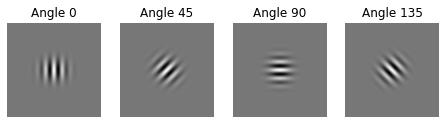

In [8]:
As = [0,45, 90, 135]

# prepare pyplot
plt.subplots_adjust(left=0, right=1, top=1, bottom=0, hspace=0, wspace=0.2)

# each angle
for i,A in enumerate(As):
    gabor = gabor_filter(K_size=111, sigma=10, gamma=1.2, Lambda=10,  psi=0, angle=A)
    
    # normalize
    out = gabor - np.min(gabor)
    out = out/np.max(out) * 255
    out = out.astype(np.uint8)
    
    # subplot
    plt.subplot(1,4,i+1)
    plt.imshow(out, cmap='gray')
    plt.axis('off')
    plt.title('Angle '+str(A))
    cv2.imwrite(f'out78_{i}.jpg', out)
    
plt.imshow()